In [131]:
import struct
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [139]:
#XOR
X = np.array([[0,0,1,1],[0,1,0,1]])
y = np.array([[0],
             [1],
             [1],
             [0]])

W1,W2,b1,b2,c = gradient_decent(X,y)

In [143]:
x = np.array([[1]
              ,[1]])
a1,a2,a3 = forward_propagation(x,W1,W2,b1,b2)
    
a3

array([[0.6494764]])

In [25]:
y

array([0, 1, 1, 0])

In [26]:
a3-y

array([[ 0.71845708, -0.29962723, -0.32426368,  0.66864932]])

In [ ]:
def cost(X,output_layer_activation,W1,W2,rho,rho_cap,lamda,beta):
    output_layer_difference = output_layer_activation - X
    MSE = 0.5 * np.sum(np.multiply(output_layer_difference,output_layer_difference))/X.shape[1]
    weight_decay = 0.5 * lamda * (np.sum(np.multiply(W1,W1)) + np.sum(np.multiply(W2,W2)))

    for j in range(rho_cap.size):
        if rho_cap[j] == 1:
            rho_cap[j] = 0.99
        if rho_cap[j] == 0:
            rho_cap[j] = 0.01
    KL_divergence = beta * np.sum(rho * np.log(rho/rho_cap) + (1-rho) * np.log((1-rho)/(1-rho_cap)))

    cost_here = MSE + weight_decay + KL_divergence
    return cost_here
    

def backprop(X,output_layer_activation,hidden_layer_activation,rho_cap,rho):
    output_layer_difference = output_layer_activation - X
    
    # Gradients

    KL_divergence_grad = beta * (-(rho/rho_cap) + ((1-rho)/(1-rho_cap)))

    delta_outer = np.multiply(output_layer_difference,np.multiply(output_layer_activation,1-output_layer_activation))
    delta_hidden = np.multiply(np.dot(np.transpose(W2),delta_outer) + np.transpose(np.matrix(KL_divergence_grad)),
                               np.multiply(hidden_layer_activation,1-hidden_layer_activation))


    W1_grad = np.dot(delta_hidden,np.transpose(X))
    W2_grad = np.dot(delta_outer,np.transpose(hidden_layer_activation))
    b1_grad = delta_hidden
    b2_grad = delta_outer

    W1_grad = W1_grad / X.shape[1] + lamda * W1
    W2_grad = W2_grad / X.shape[1] + lamda * W2
    b1_grad = b1_grad / X.shape[1]
    b2_grad = b2_grad / X.shape[1]

    W1_grad = np.array(W1_grad)
    W2_grad = np.array(W2_grad)
    b1_grad = np.array(b1_grad)
    b2_grad = np.array(b2_grad)
    
    return W1_grad,W2_grad,b1_grad,b2_grad


In [517]:
# XOR

# Neural-net structure
number_of_input_nodes = 2
number_of_hidden_nodes = 2
number_of_output_nodes = 1

# Some other parameters for neural_net
learning_rate = 0.001
max_iters = 10000
training_set_size = 4
weights_constrain = 0 

In [518]:
X = np.array([[0,0,1,1],[0,1,0,1]])
y = np.array([[0],
             [1],
             [1],
             [0]])

In [519]:
W1,W2,b1,b2 = initial_weights(number_of_input_nodes,number_of_hidden_nodes,number_of_output_nodes)
W1,W2,b1,b2,cost = gradient_decent(X,y,W1,W2,b1,b2)

TypeError: normal() got an unexpected keyword argument 'dtype'

ValueError: x and y must have same first dimension, but have shapes (10000,) and (10,)

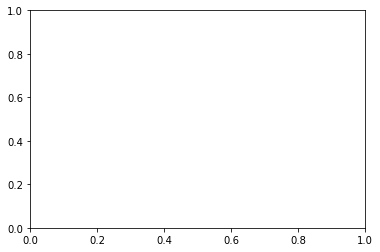

In [520]:
x = []
for i in range(max_iters):
    x.append(i)
plt.plot(x,cost)
plt.title("Cost Function")
# cost

In [458]:
W1

array([[ 1.35558072,  0.79384845],
       [-1.514808  , -0.08431195]])

In [459]:
W2

array([[ 0.55432441, -0.70629651]])

In [460]:
b1

array([[0.27277039],
       [0.11205962]])

In [461]:
b2

array([[-0.15340687]])

In [88]:
x = np.array([[0]
              ,[0]])
a1,a2,a3 = forward_propagation(x,W1,W2,b1,b2)
if a3 > 0.5:
    print(1)
else:
    print(0)

0


In [463]:
#  AND 

# Neural-net structure
number_of_input_nodes = 2
number_of_hidden_nodes = 2
number_of_output_nodes = 1

# Some other parameters for neural_net
learning_rate = 0.01
max_iters = 10000
training_set_size = 4
weights_constrain = 0 

In [464]:
X = np.array([[0,0,1,1],[0,1,0,1]])
y = np.array([[0],
             [0],
             [0],
             [1]])

In [465]:
W1,W2,b1,b2 = initial_weights(number_of_input_nodes,number_of_hidden_nodes,number_of_output_nodes)
W1,W2,b1,b2,cost = gradient_decent(X,y,W1,W2,b1,b2)

Text(0.5, 1.0, 'Cost Function')

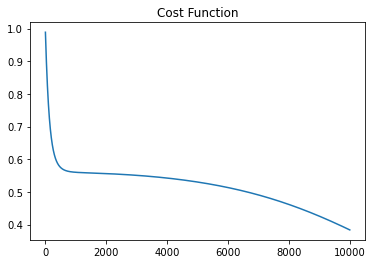

In [466]:
x = []
for i in range(max_iters):
    x.append(i)
plt.plot(x,cost)
plt.title("Cost Function")

1


In [468]:
# OR

#  AND 

# Neural-net structure
number_of_input_nodes = 2
number_of_hidden_nodes = 2
number_of_output_nodes = 1

# Some other parameters for neural_net
learning_rate = 0.01
max_iters = 10000
training_set_size = 4
weights_constrain = 0 

In [469]:
X = np.array([[0,0,1,1],[0,1,0,1]])
y = np.array([[0],
             [1],
             [1],
             [1]])

In [470]:
W1,W2,b1,b2 = initial_weights(number_of_input_nodes,number_of_hidden_nodes,number_of_output_nodes)
W1,W2,b1,b2,cost = gradient_decent(X,y,W1,W2,b1,b2)

Text(0.5, 1.0, 'Cost Function')

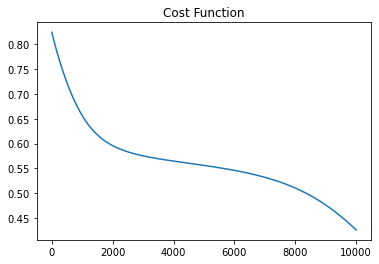

In [471]:
x = []
for i in range(max_iters):
    x.append(i)
plt.plot(x,cost)
plt.title("Cost Function")

In [472]:
x = np.array([1,0])
a1,a2,a3 = forward_propagation(x,W1,W2,b1,b2)
if a3 > 0.5:
    print(1)
else:
    print(0)

1


In [2]:
#Question-2
# Sparse-AutoEncoder


In [341]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

train_images = read_idx('train-images-idx3-ubyte')
train_labels = read_idx('train-labels-idx1-ubyte')

C:\Users\Jayanth\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [342]:
def get_data(num_of_samples,train_images,train_labels,sampled_size = 28):
    dataset = np.zeros((sampled_size*sampled_size,num_of_samples))
    label_dataset = np.zeros(num_of_samples)
    
#     No down-sampling
    for i in range(num_of_samples):
        dataset[:,i] = train_images[i].flatten()
        label_dataset[i] = train_labels[i]
        
#     print(train_labels.shape)
    return dataset,label_dataset

In [343]:
X,y  = get_data(2,train_images,train_labels)

In [344]:
y.shape

(2,)

In [7]:
# Neural-net structure
number_of_input_nodes = images.shape[0]
number_of_hidden_nodes = 100
number_of_output_nodes = images.shape[0]

# Some other parameters for neural_net
learning_rate = 0.01
max_iters = 1500
# training_set_size = 
# m =  
weights_constrain = 0

NameError: name 'images' is not defined

In [13]:
# # Initialising weights and bias: initialised to values near 0(with help of normal distribution)
# def initial_weights(number_of_input_nodes,number_of_hidden_nodes,number_of_output_nodes):
#     W1 = np.random.normal(0,1,size=(number_of_hidden_nodes,number_of_input_nodes))
#     W2 = np.random.normal(0,1,size=(number_of_output_nodes,number_of_hidden_nodes))
    
#     b1 = np.random.normal(0,1,size=(number_of_hidden_nodes,1))
#     b2 = np.random.normal(0,1,size=(number_of_output_nodes,1))
#     return W1,W2,b1,b2

def sigmoid(Z):
#     print(Z)
    return 1/(1+np.exp(-Z))

# def forward_propagation(x,W1,W2,b1,b2):
#     a1 = x.reshape(x.shape[0],1) # 2x1
    
#     z2 = W1.dot(a1)+b1
#     a2 = sigmoid(z2) #2x1
    
#     z3 = W2.dot(a2)+b2
#     a3 = sigmoid(z3) #1x1
# #     print("a3: ",a3.shape)
    
#     return a1,a2,a3



# # def backprop(dw2,dw3,W1,W2,db1,db2,dz1,dz2):

# #Gradient for KL divergence
# def get_gradient_for_KL(P_cap,P):
#     # P_cap is (num_hidden_nodes x 1)
#     # P is scalar
    
#     kl_gradient = np.zeros((P_cap.shape[0],1))
#     for i in range(P_cap.shape[0]):
#         kl_gradient[i] = (-P/P_cap[i])+((1-P)/(1-P_cap[i]))
#     return kl_gradient

# #Gradient_decent
# def gradient_decent(X,y,W1,W2,b1,b2,Sparse_autoencoder = False, P = 0.1, beta = 3):
#     cost_list = []
#     m = X.shape[1]
#     eplison = 1e-4
    
#     for i in range(max_iters):
#         cost = 0

#         dw1 = 0
#         dw2 = 0
#         db1 = 0
#         db2 = 0
        
#         p = np.zeros((number_of_hidden_nodes,1))
        
#         if Sparse_autoencoder:
#             for j in range(m):
#                 #Forward prop
#                     a1,a2,a3 = forward_propagation(X[:,j],W1,W2,b1,b2)
#                     p += a2
                    
#         p /= m
#         p += eplison
#         # p denotes probability of firing
        
#         for j in range(m):
            
#         #Forward prop
#             a1,a2,a3 = forward_propagation(X[:,j],W1,W2,b1,b2)
#         #Back Prop
#             if not Sparse_autoencoder:
#                 dz3 = a3-y[j] # 1x1
#                 dw2 += dz3.dot(a2.T) # 1x2

#                 dz2 = np.multiply((W2.T*dz3),a2*(1-a2)) # 2x1 # (delta's)
#                 dw1 += dz2.dot(a1.T)

#                 db1 += dz2
#                 db2 += dz3
#             else:
                
#                 dz3 = a3-y[:,j].reshape((X.shape[0],1)) # 784x1
#                 dw2 = dz3.dot(a2.T) # 784x1 . 1x100 = 784x100
                
#                 # Need to run over all training set to get P_cap:
#                 # Need to calculate P_cap[1],P_cap[2] and (find hidden_nodes)x1 KL divergence gradient vector the add to dz2
                
#                 KL_divergence_gradient = get_gradient_for_KL(p,P)
#                 dz2 = np.multiply((W2.T@dz3),a2*(1-a2)) + KL_divergence_gradient
#                 dw1 += dz2.dot(a1.T)

#                 db1 += dz2
#                 db2 += dz3
            
#         # Cost: taking logistic cost function(like classification problem) 
# #             cost += -((y[j]*np.log(a3)) + ((1-y[j])*np.log(1-a3)))
#         cost += np.sum((y-a3)**2)
        
#         W1 = W1 - (learning_rate*(dw1/m) + ((weights_constrain/m) * W1))
#         W2 = W2 - (learning_rate*(dw2/m) + ((weights_constrain/m) * W2))
        
#         b1 = b1 - (learning_rate*(db1/m))
#         b2 = b2 - (learning_rate*(db2/m))
        
#         KL_error = 0
#         for j in range(number_of_hidden_nodes):
#             if p[j][0] >= 1:
#                 p[j][0] -= 0.001
#             KL_error += (P*np.log(P) - P*np.log(p[j][0]) + (1-P)*np.log(1-P) - (1-P)*np.log(1-p[j][0]))
            
        
#         s = ((cost/m)+(weights_constrain/(2*m))*(np.sum(W1**2) + np.sum(W2**2))) + KL_error
#         print(KL_error)
#         cost_list.append(s)

#     return W1,W2,b1,b2,cost_list        

# W1,W2,b1,b2 = initial_weights(number_of_input_nodes,number_of_hidden_nodes,number_of_output_nodes)
# W1,W2,b1,b2,cost = gradient_decent(images,images,W1,W2,b1,b2,Sparse_autoencoder=True)

In [9]:
# x = []
# for i in range(max_iters):
#     x.append(i)
# plt.plot(x,cost)
# plt.title("Cost Function")
# # cost

In [143]:
x = images[:,2].reshape(images[:,1].size,1)

In [11]:
a1,a2,a3 = forward_propagation(x,W1,W2,b1,b2)

In [144]:
plt.imshow(a3.reshape(28,28),cmap="gray")

ValueError: cannot reshape array of size 156800 into shape (28,28)

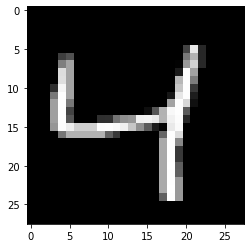

In [178]:
plt.imshow(x.reshape(28,28),cmap = 'gray')

In [65]:
number_of_input_nodes = X.shape[0]
number_of_hidden_nodes = 800
number_of_output_nodes = X.shape[0]

def Sparse_autoencoder(X,number_of_input_nodes,number_of_hidden_nodes,max_iters = 8000):
    W1 = np.random.normal(0,1,size=(number_of_hidden_nodes,number_of_input_nodes))
    W2 = np.random.normal(0,1,size=(number_of_input_nodes,number_of_hidden_nodes))
    
    b1 = np.random.normal(0,1,size=(number_of_hidden_nodes,1))
    b2 = np.random.normal(0,1,size=(number_of_input_nodes,1))
    
    lamda = 0.1
    beta = 0.00001
    rho = 0.1
    learning_rate = 0.01
    
    cost_list = []
    
    for i in range(max_iters):

        # Forward
        hidden_layer_activation = sigmoid(np.dot(W1,X) + b1)
        output_layer_activation = sigmoid(np.dot(W2,hidden_layer_activation) + b2)

        rho_cap = np.sum(hidden_layer_activation,axis = 1)/X.shape[1]

        # Backprop
        output_layer_difference = output_layer_activation - X

        MSE = 0.5 * np.sum(np.multiply(output_layer_difference,output_layer_difference))/X.shape[1]
        weight_decay = 0.5 * lamda * (np.sum(np.multiply(W1,W1)) + np.sum(np.multiply(W2,W2)))

        for j in range(rho_cap.size):
            if rho_cap[j] == 1:
                rho_cap[j] = 0.99
            if rho_cap[j] == 0:
                rho_cap[j] = 0.01
        KL_divergence = beta * np.sum(rho * np.log(rho/rho_cap) + (1-rho) * np.log((1-rho)/(1-rho_cap)))

        cost = MSE + weight_decay + KL_divergence

        # Gradients

        KL_divergence_grad = beta * (-(rho/rho_cap) + ((1-rho)/(1-rho_cap)))

        delta_outer = np.multiply(output_layer_difference,np.multiply(output_layer_activation,1-output_layer_activation))
        delta_hidden = np.multiply(np.dot(np.transpose(W2),delta_outer) + np.transpose(np.matrix(KL_divergence_grad)),
                                   np.multiply(hidden_layer_activation,1-hidden_layer_activation))
        

        W1_grad = np.dot(delta_hidden,np.transpose(X))
        W2_grad = np.dot(delta_outer,np.transpose(hidden_layer_activation))
        b1_grad = delta_hidden
        b2_grad = delta_outer

        W1_grad = W1_grad / X.shape[1] + lamda * W1
        W2_grad = W2_grad / X.shape[1] + lamda * W2
        b1_grad = b1_grad / X.shape[1]
        b2_grad = b2_grad / X.shape[1]

        W1_grad = np.array(W1_grad)
        W2_grad = np.array(W2_grad)
        b1_grad = np.array(b1_grad)
        b2_grad = np.array(b2_grad)

        W1 = W1 - learning_rate * W1_grad
        W2 = W2 - learning_rate * W2_grad
        b1 = b1 - learning_rate * b1_grad
        b2 = b2 - learning_rate * b2_grad
        
        cost_list.append(cost)
    return W1,W2,b1,b2,cost_list
        

In [66]:
W1,W2,b1,b2,c =  Sparse_autoencoder(X,number_of_input_nodes,number_of_hidden_nodes)

C:\Users\Jayanth\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


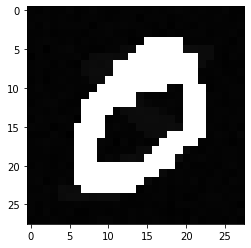

In [67]:
hidden_layer_activation = sigmoid(np.dot(W1,X) + b1)
output_layer_activation = sigmoid(np.dot(W2,hidden_layer_activation) + b2)
plt.imshow(output_layer_activation[:,1].reshape(28,28),cmap = 'gray')

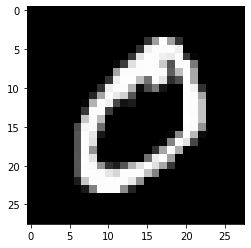

In [68]:
plt.imshow(X[:,1].reshape(28,28),cmap = 'gray')

In [69]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
